Name: Chanyu Choung

Class: CMP414

Homework due date: Mar 22nd, 2021 (Monday)

# Artificial Intelligence Midterm Project

In this project, you will build a regression model and a classification model from scratch. Please follow the instructions closely, and only use Python's Numpy, Pandas, and matplotlib library to complete this project. Using functions from `sklearn` is not allowed.

**Part I** dues on Monday, March 22nd at 11:59 PM.
**Part II** dues on Monday, April 12th at 11:59 PM.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part II: A Classification Model

In this part, we will build a logistic regression model and evaluate its performance on the classifying the data. The dataset is as follows:


In [ ]:
# Given data frame
data2 = pd.DataFrame([[5.0, 2.0, 1],
                      [6.2, 3.4, 1],
                      [4.9, 3.6, 0],
                      [6.2, 2.2, 1],
                      [5.7, 3.0, 1],
                      [4.8, 3.4, 0],
                      [5.0, 3.4, 0]],
                     columns=["x1", "x2", "class"])
print(data2.head())

    x1   x2  class
0  5.0  2.0      1
1  6.2  3.4      1
2  4.9  3.6      0
3  6.2  2.2      1
4  5.7  3.0      1


### Task 1: Data Visualization (10 pts)
Visualize the data as a scatter plot. Show class 0 records as green dots and class 1 records as blue dots. Display the following items:
- Title of the plot: Distribution of the training data
- Label for x axis: x1
- Label for y axis: x2
- Legend

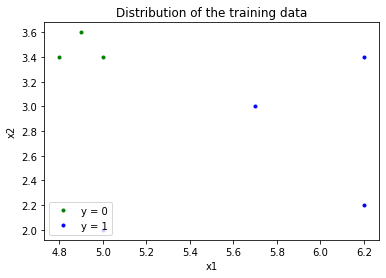

In [ ]:
# Data Visualization
green_dots = data2[data2['class'] == 0]
blue_dots = data2[data2['class'] == 1]
plt.plot(green_dots['x1'], green_dots['x2'], 'g.', label='y = 0')
plt.plot(blue_dots['x1'], blue_dots['x2'], 'b.', label='y = 1')
plt.title("Distribution of the training data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='lower left')
plt.show()

### Task 2: Apply A Logistic Regression Model (10 pts)

Suppose that you are given a logistic regression model with explicity paramter values:

$p = \sigma(\textbf{x}\cdot\theta^T).$

where
- p: the probability that the point belongs to class 1.
- $\textbf{x} = (1, x_1, x_2)$.
- $\theta = (\theta_0, \theta_1, \theta_2) = (-2.15, 0.92, -0.82)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$

Find the model's prediction on the following test set:

In [ ]:
# Given data frame
data3 = pd.DataFrame([[5.1, 3.4, 0],
                      [6.5, 2.8, 1],
                      [5.8, 2.7, 1],
                      [4.6, 3.1, 0]],
                     columns=["x1", "x2", "class"])
print(data3.head())

    x1   x2  class
0  5.1  3.4      0
1  6.5  2.8      1
2  5.8  2.7      1
3  4.6  3.1      0


In [ ]:
# Model Prediction
X = np.c_[np.ones((4, 1)), data3[['x1','x2']]]
theta = np.array([-2.15, 0.92, -0.82])

def sigmoid(n):
  return 1 / (1 + np.exp(-n))

p = sigmoid(np.dot(X, theta.T))
print("p:", p)

# Round Decision Rule
predictions = []
for i in range(len(p)):
    if p[i] < 0.5:
        val = 0
    else:
        val = 1
    predictions.append(val)
print("prediction:", predictions)

p: [0.43880828 0.82259081 0.72551796 0.38698582]
prediction: [0, 1, 1, 0]


### Task 3: Model Evaluation (40 pts)
Calculate the following model metrics regarding the performance on the test set:
- classification accuracy
- precision score
- recall score
- F-1 score

In [ ]:
# Classification Accuracy
array1 = np.array(data3['class'])
array2 = np.array(predictions)

count = 0
for i in range(len(array1)):
    actual = array1[i]
    pred = array2[i]
    if actual == pred:
        count = count + 1
accuracy = count / len(array1)
print("accuracy", accuracy)

accuracy 1.0


In [ ]:
# True Posiive, False Positive, False Negative
true_pos, false_pos, false_neg = 0, 0, 0
def score(atype, x, y):
    for i in range(len(array1)):
        label = array1[i]
        pred = array2[i]
        if label == x and pred == y :
            atype = atype + 1
    return atype
true_pos = score(true_pos, 1, 1)
false_pos = score(false_pos, 0, 1)
false_neg = score(false_neg, 1, 0)
print("true pos:", true_pos)
print("false pos:", false_pos)
print("false neg:", false_neg)

true pos: 2
false pos: 0
false neg: 0


In [ ]:
# Precision Score
precision = true_pos / (true_pos + false_pos)
print("precision:", precision)

precision: 1.0


In [ ]:
# Recall Score
recall = true_pos / (true_pos + false_neg)
print("recall:", recall)

recall: 1.0


In [ ]:
# F-1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print("f1:", f1)

f1: 1.0
